<a href="https://colab.research.google.com/github/SohamJoshi25/CurrencyConverter/blob/main/Dental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ImagesUFPE.zip", 'r')
zip_ref.extractall("/content/Images")
zip_ref.close()

In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
df = pd.read_csv('/content/Database.csv')

# Define the directory where your images are currently stored
image_dir = '/content/Images/Coronal'

# Split the dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['type'], random_state=42)

# Create directories for each category and subdirectories for train/test
for category in df['type'].unique():
    os.makedirs(f'train/{category}', exist_ok=True)
    os.makedirs(f'test/{category}', exist_ok=True)

# Function to move images to their respective folders (train/test)
def move_image(image_name, category, set_type):
    image_name = str(image_name)+".png"
    src = os.path.join(image_dir,  image_name)
    print(src)  # Source image path
    dest_folder = os.path.join(set_type, f'{category}')  # Destination folder (train/test/category_X)
    dest = os.path.join(dest_folder,  image_name)  # Destination image path

    if os.path.exists(src):
        shutil.move(src, dest)  # Move the image
    else:
        print(f"Image {image_name} not found!")

# Move train images
train_df.apply(lambda row: move_image(row['file'], row['type'], 'train'), axis=1)

# Move test images
test_df.apply(lambda row: move_image(row['file'], row['type'], 'test'), axis=1)


/content/Images/Coronal/254.png
/content/Images/Coronal/878.png
/content/Images/Coronal/513.png
/content/Images/Coronal/466.png
/content/Images/Coronal/704.png
/content/Images/Coronal/440.png
/content/Images/Coronal/636.png
/content/Images/Coronal/191.png
/content/Images/Coronal/110.png
/content/Images/Coronal/193.png
/content/Images/Coronal/292.png
/content/Images/Coronal/323.png
/content/Images/Coronal/387.png
/content/Images/Coronal/882.png
/content/Images/Coronal/231.png
/content/Images/Coronal/999.png
/content/Images/Coronal/453.png
/content/Images/Coronal/843.png
/content/Images/Coronal/977.png
/content/Images/Coronal/622.png
/content/Images/Coronal/947.png
/content/Images/Coronal/321.png
/content/Images/Coronal/222.png
/content/Images/Coronal/859.png
/content/Images/Coronal/974.png
/content/Images/Coronal/869.png
/content/Images/Coronal/408.png
/content/Images/Coronal/748.png
/content/Images/Coronal/261.png
/content/Images/Coronal/785.png
/content/Images/Coronal/107.png
/content

,0
328,None
487,None
685,None
827,None
174,None
...,...
44,None
469,None
303,None
981,None


In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout,Input
from keras.applications import ResNet50, VGG16

In [ ]:
input_shape = (115, 186, 3)

base_conv_model_resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(115, 186, 3))
base_conv_model_vgg = VGG16(weights='imagenet', include_top=False,input_shape=(115, 186, 3))

In [ ]:
base_conv_model_vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 115, 186, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 115, 186, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 115, 186, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 57, 93, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 57, 93, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 57, 93, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 28, 46, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 28, 46, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 28, 46, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 28, 46, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 14, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 14, 23, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 14, 23, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 14, 23, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 7, 11, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 7, 11, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 7, 11, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 7, 11, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(base_conv_model_resnet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
base_conv_model_resnet.trainable = False

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(115,186)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(115,186)
)

Found 800 files belonging to 3 classes.
Found 200 files belonging to 3 classes.


In [ ]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.3470 - loss: 5.5127 - val_accuracy: 0.4500 - val_loss: 1.0920
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.3504 - loss: 1.4408 - val_accuracy: 0.3650 - val_loss: 1.1460
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.4487 - loss: 1.0802 - val_accuracy: 0.4500 - val_loss: 1.0808
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.4133 - loss: 1.0962 - val_accuracy: 0.2650 - val_loss: 1.2363
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.4053 - loss: 1.3180 - val_accuracy: 0.4500 - val_loss: 1.3404
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.4642 - loss: 1.0856 - val_accuracy: 0.4600 - val_loss: 1.0732
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.4638 - loss: 1.0449 - val_accuracy: 0.4500 - val_loss: 1.2779
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.4354 - loss: 1.1088 - val_accuracy: 0.4500 - val_los

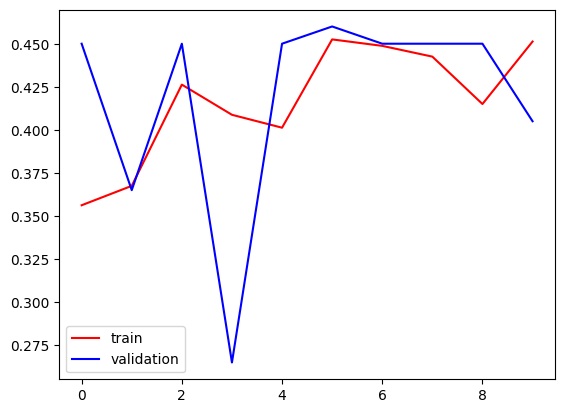

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

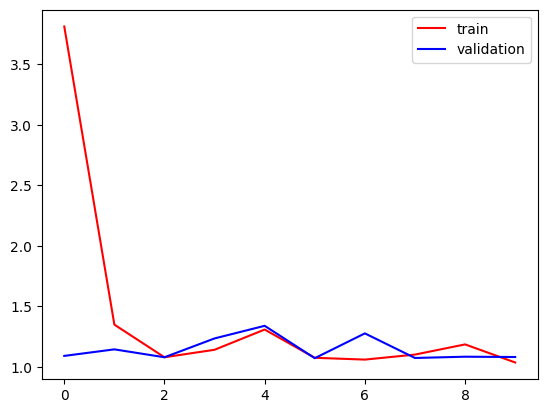

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()